In [18]:
#Find the directory in which you are working to get the data 
pwd

'/mnt/c/Users/hp/venv/Untitled Folder'

In [19]:
#import data
import pandas as pd
data = pd.read_csv("/mnt/c/Users/hp/venv/iris.csv")
data.sample(5)
features=data[data.columns[1:5]]
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
#Get information about data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
#Count values of different classes 
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [22]:
#As our label is given in string format
#Change it in numerical data
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
label=l.fit_transform(data["Species"])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
#Add diferent series for numerical data
data["species"]=pd.Series(label)


In [24]:
#Drop the previous categorical data
data=data.drop("Species",axis='columns')

In [25]:
#Visualize data
data.sample(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,1,5.1,3.5,1.4,0.2,0
146,147,6.3,2.5,5.0,1.9,2
70,71,5.9,3.2,4.8,1.8,1
65,66,6.7,3.1,4.4,1.4,1


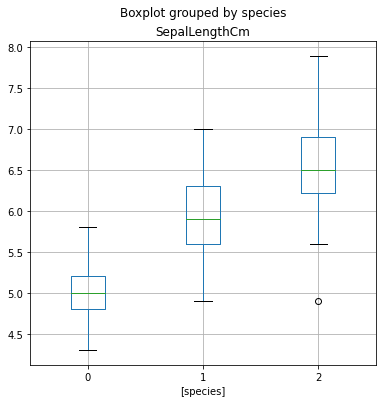

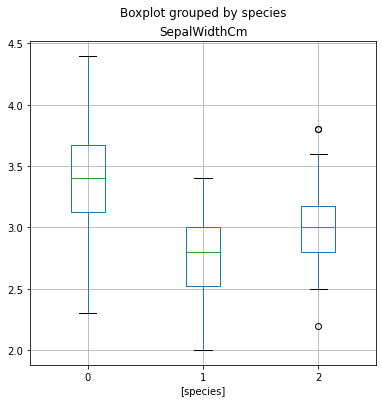

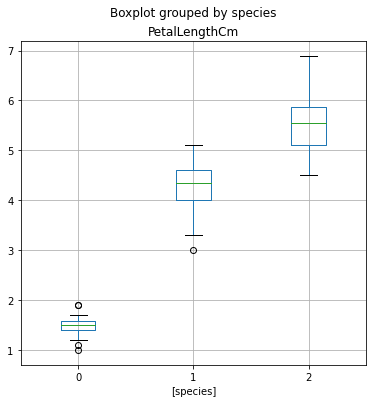

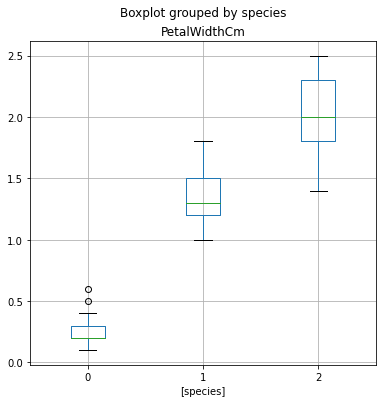

In [26]:
# Compare features with labels
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
label=['species']
for col in features:
    data.boxplot(column=col,by=label,figsize=(6,6))
    

In [27]:
#Train your model
from sklearn.model_selection import train_test_split
X=data[features].values
Y=data['species'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
print(X_train.shape[0],X_test.shape[0])

105 45


In [28]:
# Make model using Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier().fit(X_train,Y_train)
print(model)

DecisionTreeClassifier()


In [29]:
#Predict values using our testing data
predictions=model.predict(X_test)
print("Predicted values:",predictions[:10])
print("Actual Values:   ",Y_test[:10])

Predicted values: [2 1 0 2 0 2 0 1 1 1]
Actual Values:    [2 1 0 2 0 2 0 1 1 1]


In [30]:
#Evaluate your model
from sklearn.metrics import classification_report

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [49]:
#Find accuracy of model
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(predictions,Y_test))

Accuracy: 0.9777777777777777


In [32]:
#Find cofudion matrix
from sklearn.metrics import confusion_matrix
mcm=confusion_matrix(predictions,Y_test)
mcm

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]])

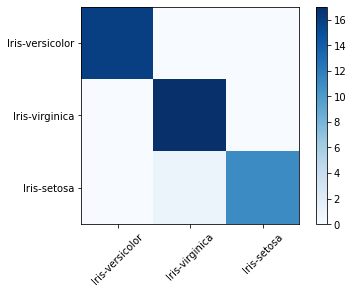

In [33]:
#Draw a heatmap
import numpy as np
li=['Iris-versicolor','Iris-virginica','Iris-setosa']
from matplotlib import pyplot as plt
plt.imshow(mcm,cmap=plt.cm.Blues)
tick_marks=np.arange(len(li))
plt.xticks(tick_marks,li,rotation=45)
plt.yticks(tick_marks,li)
plt.colorbar()
plt.show()

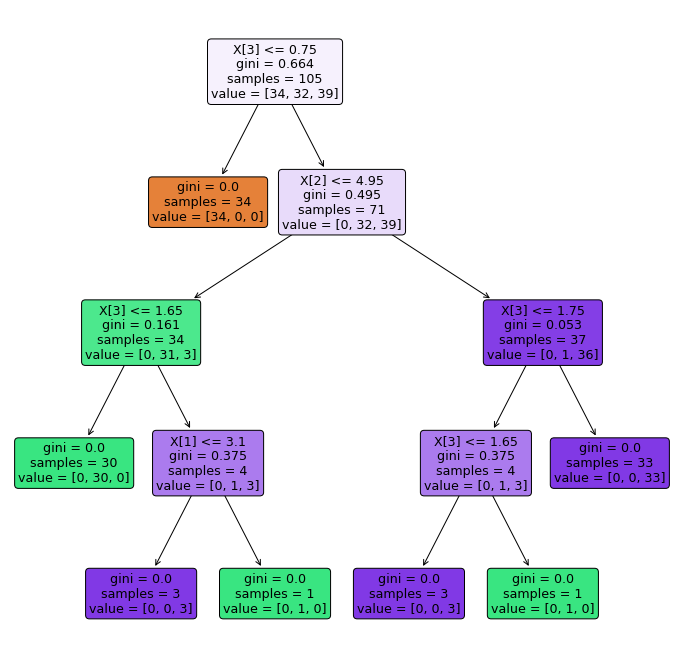

In [48]:
#Visualize Tree
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(model,rounded=True,filled=True)
plt.show()
